In [11]:
from validator.InstanceCO22 import InstanceCO22
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
from util import *
%load_ext autoreload
%autoreload 2
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
instance = loadInstance(1)
dir(instance)

['BaseParseException',
 'Dataset',
 'Days',
 'Hub',
 'Hubs',
 'LANG',
 'Location',
 'Locations',
 'Product',
 'Products',
 'Request',
 'Requests',
 'TruckCapacity',
 'TruckCost',
 'TruckDayCost',
 'TruckDistanceCost',
 'TruckMaxDistance',
 'VanCapacity',
 'VanCost',
 'VanDayCost',
 'VanDistanceCost',
 'VanMaxDistance',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_checkAssignment',
 '_checkError',
 '_checkHub',
 '_checkInt',
 '_checkWarning',
 '_doinit',
 '_getNextLine',
 '_initData',
 '_initFile',
 '_initTXT',
 '_initType',
 '_isAssignment',
 '_writeAssignment',
 '_writeInstanceTXT',
 'breakOnError',
 'calcDistance',
 'calculateDistances',
 'deliverEarlyPenalty',


In [ ]:
instance.TruckDayCost

200

## Instance in complete

In [ ]:
def plotInstance(instance):
    plt.figure(figsize=(7,7))
    locX = [_.X for _ in instance.Locations]
    locY = [_.Y for _ in instance.Locations]
    nHubs = len(instance.Hubs)
    plt.scatter(locX[0], locY[0], marker=",", label="Depot")
    plt.scatter(locX[1:1+nHubs], locY[1:1+nHubs],marker="^", label="Hub")
    plt.scatter(locX[1+nHubs:], locY[1+nHubs:],marker='.')
    plt.legend()

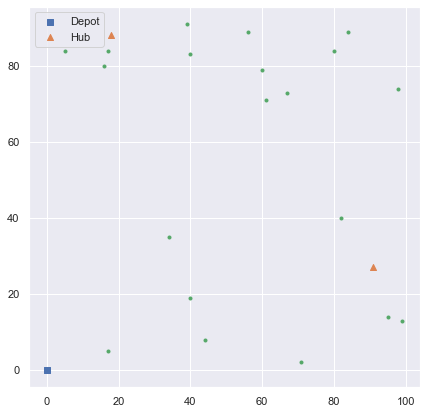

In [ ]:
plotInstance(instance)

## Instance per day

In [ ]:
instance = loadInstance(10)

In [ ]:
def plotInstancePerDay(instance):
    nDays = instance.Days
    nCol = 5
    fig, axs = plt.subplots(ncols= nCol, nrows = int(math.ceil(nDays/nCol)), figsize=(20,15), sharex=True, sharey=True)
    requests_copy = instance.Requests.copy()
    nHubs = len(instance.Hubs)
    locX = [_.X for _ in instance.Locations]
    locY = [_.Y for _ in instance.Locations]
    depotX, depotY = instance.Locations[0].X, instance.Locations[0].Y
    hubsX = locX[1:1+nHubs]
    hubsY = locY[1:1+nHubs]
    row, col = None, None
    for i in range(1,instance.Days+1):
        requests_for_day = [_ for  _ in requests_copy if _.desiredDay is i]
        loc_ids = [_.customerLocID for _ in requests_for_day]
        locations = [_ for _ in instance.Locations if _.ID in loc_ids]
        locX_day = [_.X for _ in locations]
        locY_day = [_.Y for _ in locations]
        row = math.ceil(i/nCol)-1
        col = (i-1)%nCol
        axs[row][col].scatter(locX, locY, marker='.',alpha=0.1, c='black', label="Loc w/0 request")
        axs[row][col].scatter(locX_day, locY_day, marker='.', c='black', label="Loc w/ request")
        axs[row][col].scatter(hubsX, hubsY,marker="^", label="Hub")
        axs[row][col].scatter(depotX, depotY, marker=',', label="Depot")
        axs[row][col].set_title(f"desiredDay {i}")
    handles, labels = axs[row][col].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')


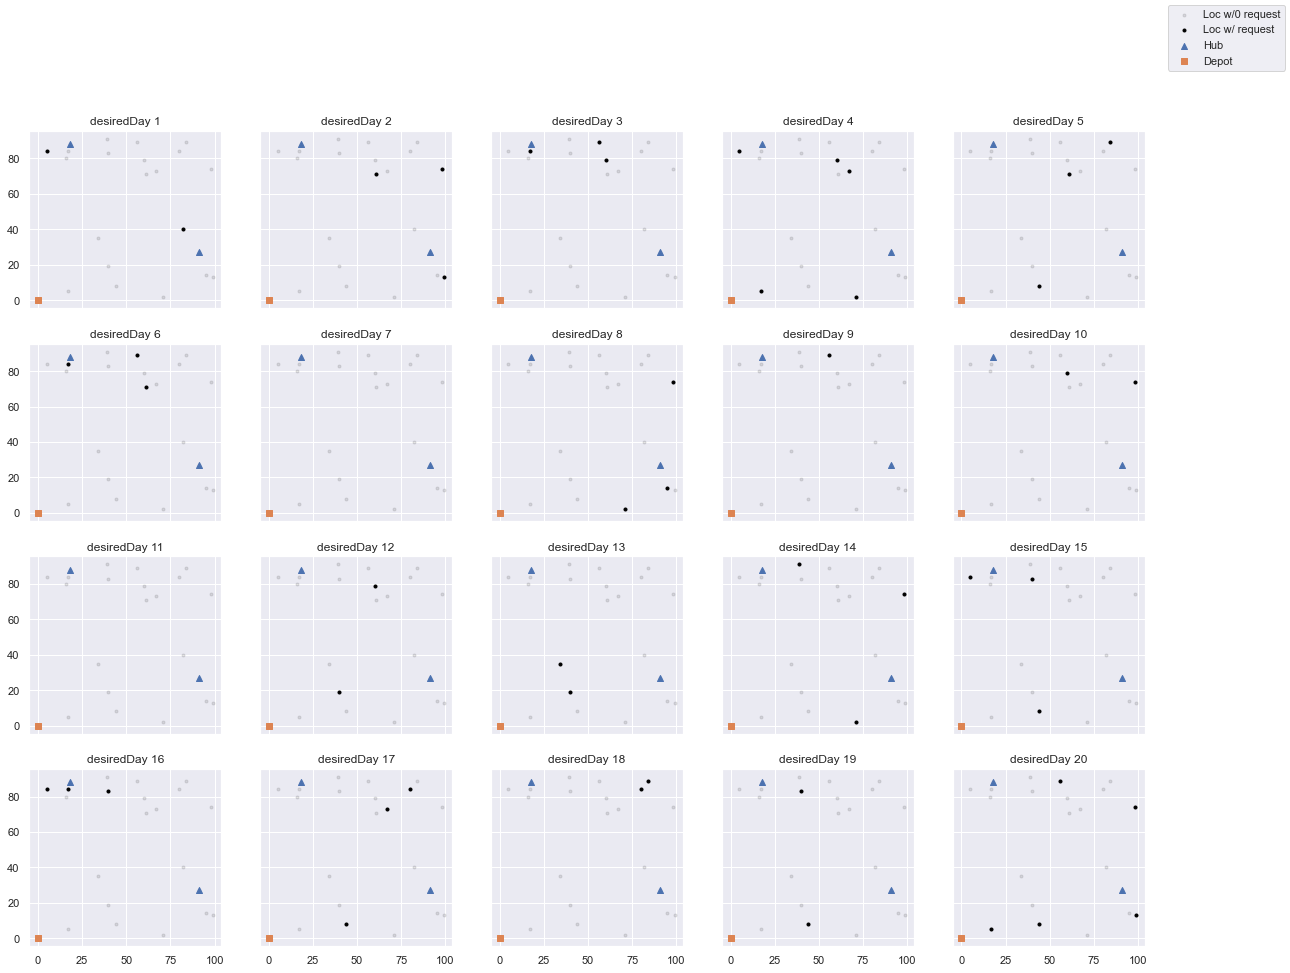

In [ ]:
plotInstancePerDay(instance)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=753de76d-10e8-4df1-99e9-23420669c377' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>